# Assignment 3
## Exercise 3: Comparison of Different Linkages

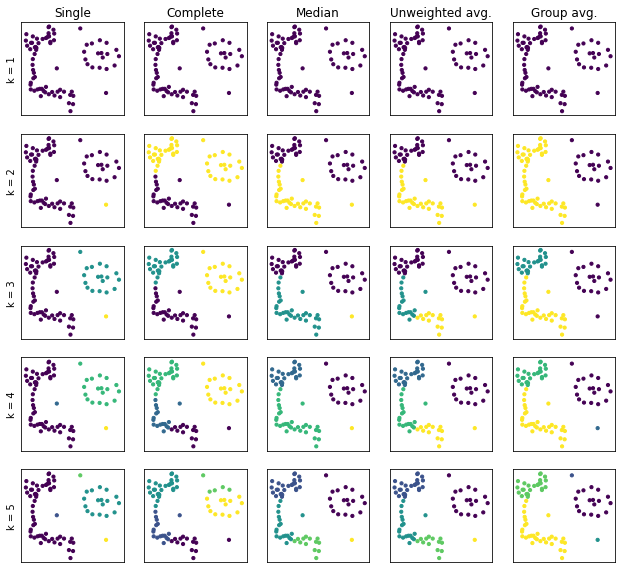

In [1]:
import pickle
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

data = pickle.load(open('data.pickle', 'rb'))

links = ['single', 'complete', 'median', 'weighted', 'average']
link_names = ['Single', 'Complete', 'Median', 'Unweighted avg.', 'Group avg.']

fig, axs = plt.subplots(5,5,sharex=True, sharey=True)
fig.subplots_adjust(top=2,right=1.5) # enlarge individual plots

for k in range(1,6):
    for i in range(len(links)):
        # Apply the agglomerative algorithm to obtain the hierarchyinformation
        tree = linkage(data, method=links[i], optimal_ordering=True)

        # Undo the last merges to retrieve at most k clusters
        labels = fcluster(tree, k, criterion='maxclust')
        
        axs[k-1,i].scatter(data[:,0],data[:,1], c=labels, s=10)
        axs[k-1,i].axes.xaxis.set_ticks([]) # turn off axis values and ticks
        axs[k-1,i].axes.yaxis.set_ticks([]) # turn off axis values and ticks
        
        # generate labels at the side
        if k == 1:
            axs[k-1,i].set_title(link_names[i])
        if i == 0:
            axs[k-1,i].set_ylabel(f'k = {k}')
plt.show()

3. Explain for the single-linkage and complete-linkage inter-cluster distances how the clusters in 𝑘 = 2 arise. Start with the clusters in 𝑘 = 3 and explain the merge from 𝑘 = 3 to 𝑘 = 2.
- *single-linkage*: The yellow dot is the the furthest away from all other dots. Thus it stays a separate cluster while the blue ring (for k=3) has data points closer to a point from the big purple cluster and gets incorporated.
- *complete-linkage*: The furthest point in the blue cluster is closer to the yellow cluster than the furthest point of the purple cluster. Thus the two upper clusters are merged.